In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [2]:
# reading dataset
df=pd.read_csv("C:/Users/manish arram/ml/DATA S/FP/cars_datafinal - Sheet1.csv")
df1=df.copy()

In [42]:
df.head(3)

,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type
0,2010 Maruti Alto LXI,"₹ 174,699",4out of 5,3686,"Kilometers34,854 km",Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,NaN,Insurance TypeInsurance Expired
1,2013 Maruti Wagon R 1.0 VXI,"₹ 333,999",4.2out of 5,3686,"Kilometers39,541 km",Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance6/8/2021,Insurance TypeComp
2,2014 Maruti Wagon R 1.0 VXI,"₹ 353,199",4.3out of 5,3686,"Kilometers23,233 km",Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance28/4/2021,Insurance TypeComp


In [14]:
print('the sum of {0} and {1} is {2}'.format(2,10,12))

the sum of 2 and 10 is 12


In [3]:
# checking null values
print('NULL Values in each column :')
df1.isnull().sum()

NULL Values in each column :


Name                   0
Price                  0
Rating                 0
city                   0
Kilometers             0
Year_of_Purchase       0
Owner                  0
Fuel_Type              0
Transmission        2816
RTO                    0
Insurance           9193
Insurance_Type         0
dtype: int64

visualization of NULL Values in dataset : 


<AxesSubplot:>

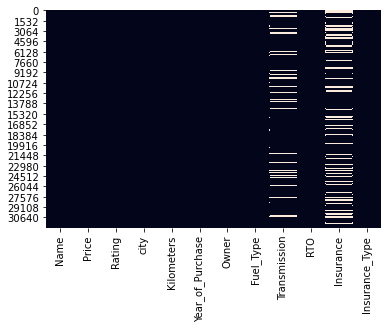

In [4]:
print("visualization of NULL Values in dataset : ")
sns.heatmap(df1.isnull(), cbar=False)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32158 entries, 0 to 32157
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              32158 non-null  object
 1   Price             32158 non-null  object
 2   Rating            32158 non-null  object
 3   city              32158 non-null  int64 
 4   Kilometers        32158 non-null  object
 5   Year_of_Purchase  32158 non-null  object
 6   Owner             32158 non-null  object
 7   Fuel_Type         32158 non-null  object
 8   Transmission      29342 non-null  object
 9   RTO               32158 non-null  object
 10  Insurance         22965 non-null  object
 11  Insurance_Type    32158 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.9+ MB


In [6]:
df1.describe()

,city
count,32158.000000
mean,2883.844207
std,1569.462476
min,290.000000
25%,1692.000000
50%,2423.000000
75%,4709.000000
max,5732.000000


<AxesSubplot:>

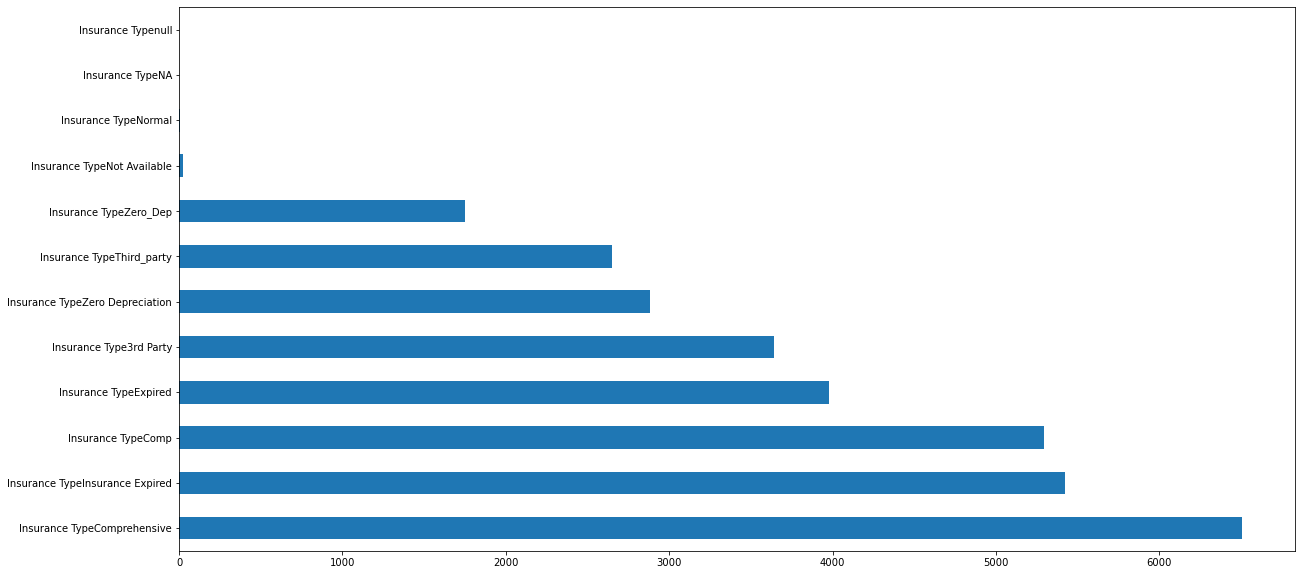

In [7]:
df1['Insurance_Type'].value_counts().plot(kind='barh', figsize=(20,10))

<AxesSubplot:>

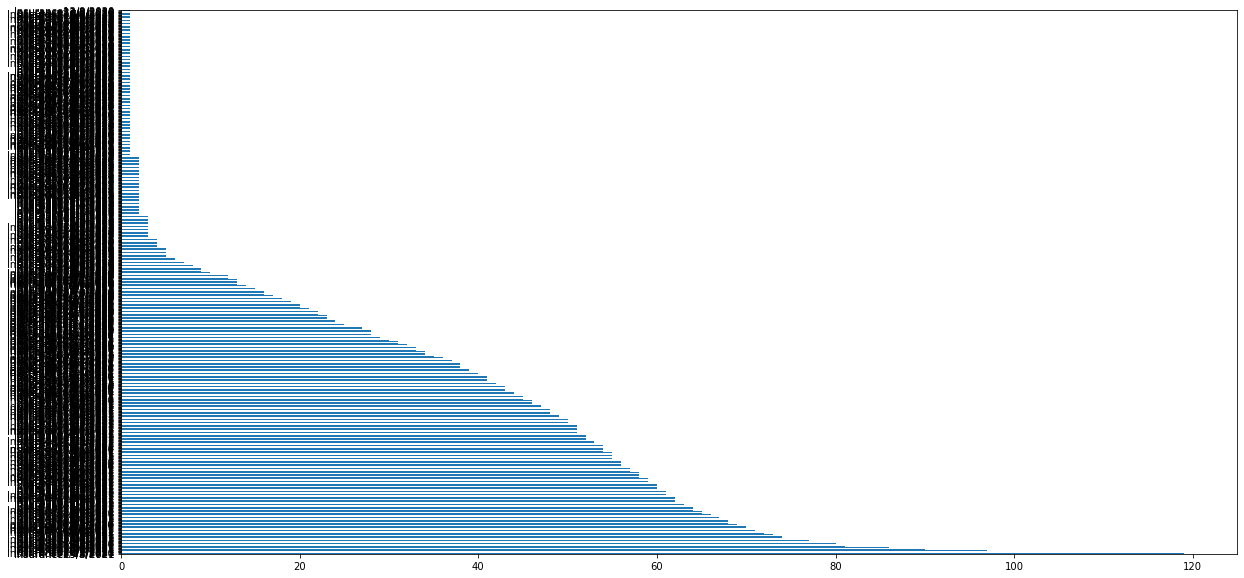

In [8]:
df['Insurance'].value_counts().plot(kind='barh', figsize=(20,10))

<AxesSubplot:>

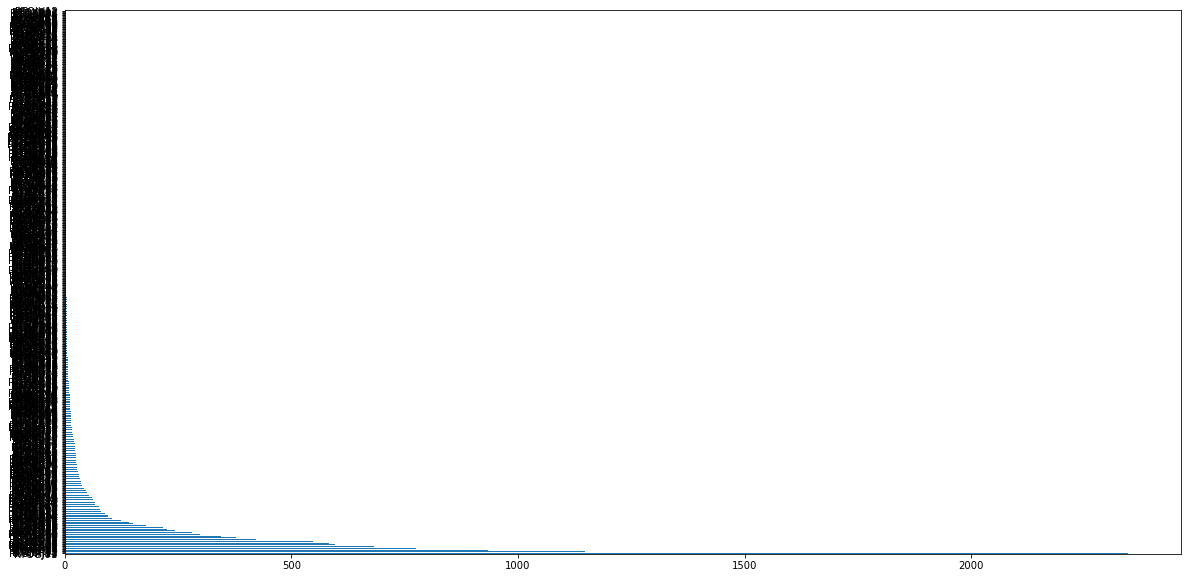

In [9]:
df['RTO'].value_counts().plot(kind='barh', figsize=(20,10))

<AxesSubplot:>

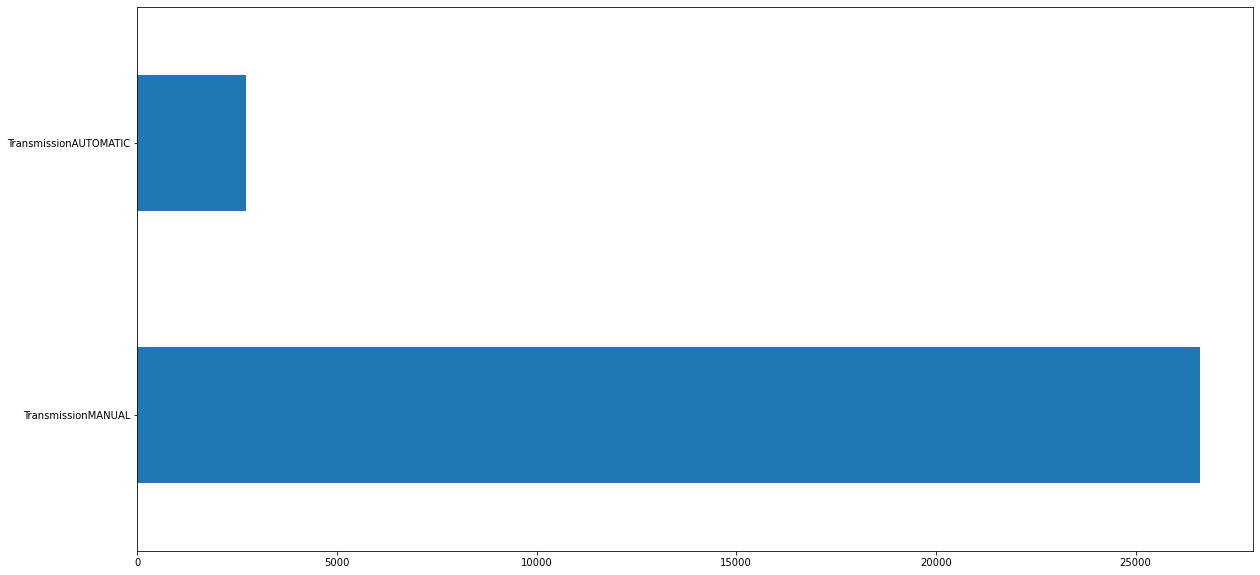

In [10]:
df['Transmission'].value_counts().plot(kind='barh', figsize=(20,10))

<AxesSubplot:>

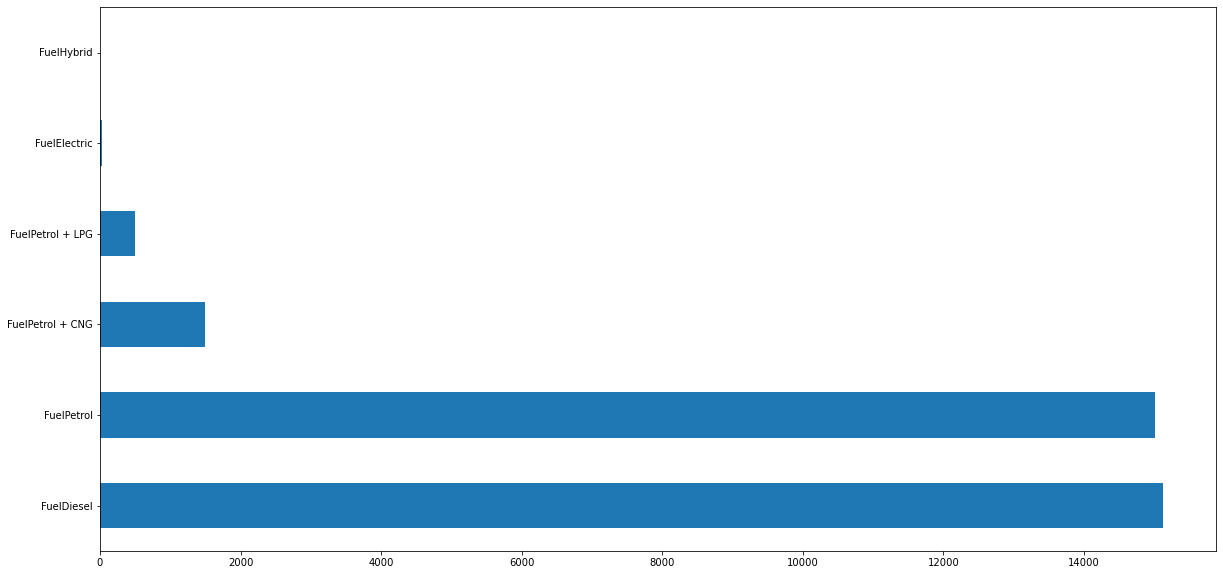

In [11]:
df['Fuel_Type'].value_counts().plot(kind='barh', figsize=(20,10))

<AxesSubplot:>

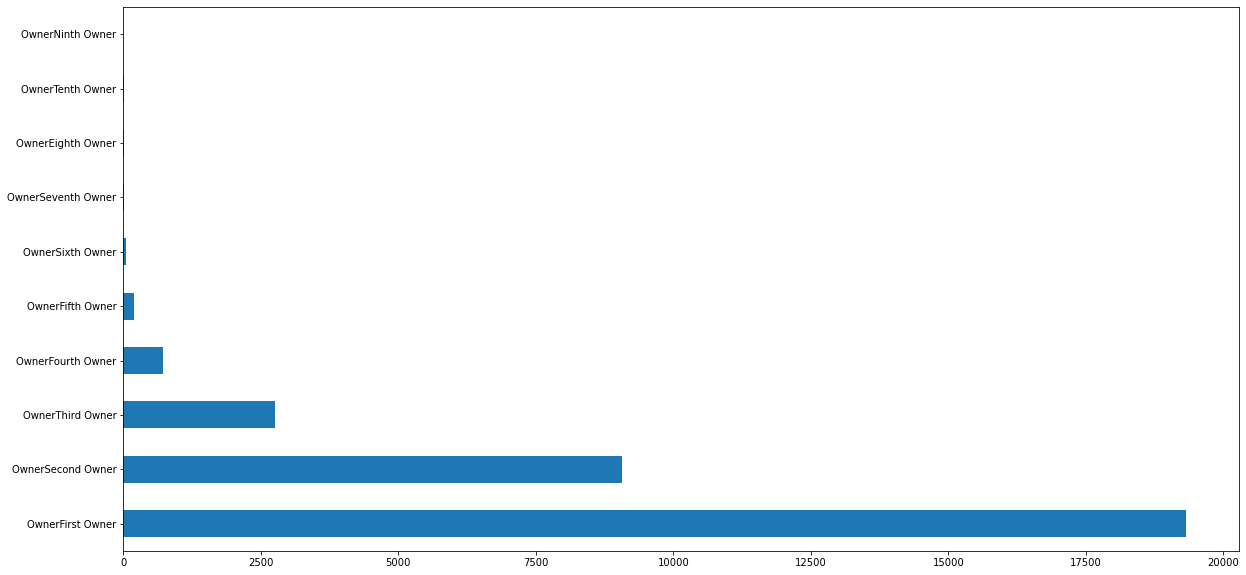

In [12]:
df['Owner'].value_counts().plot(kind='barh', figsize=(20,10))

<AxesSubplot:>

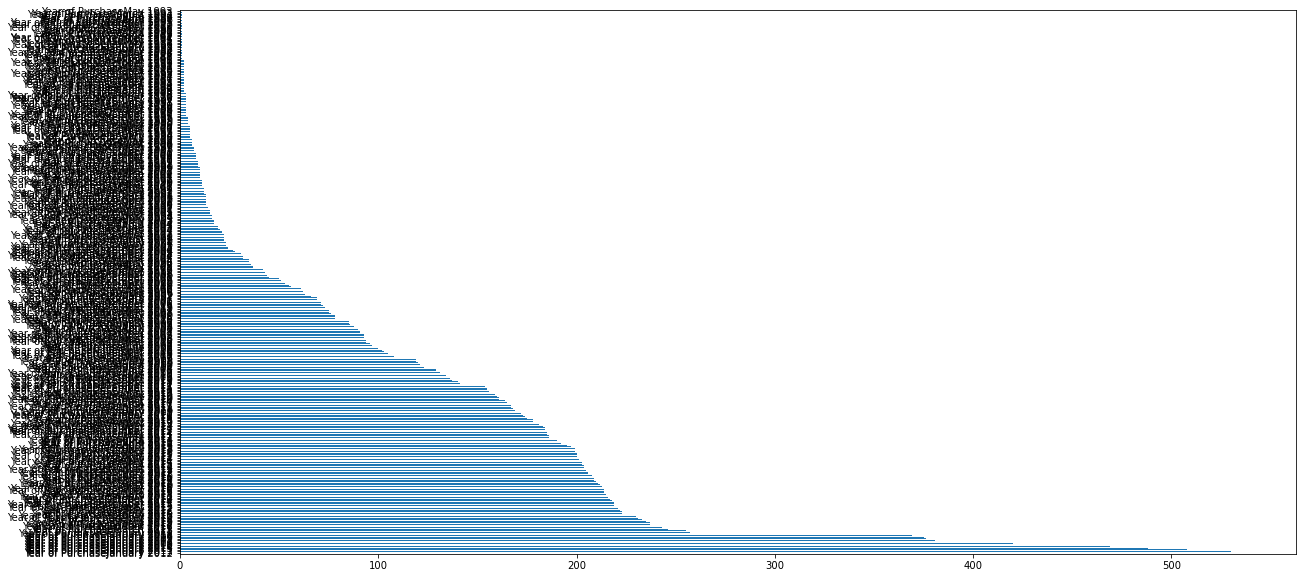

In [13]:
df['Year_of_Purchase'].value_counts().plot(kind='barh', figsize=(20,10))

<AxesSubplot:>

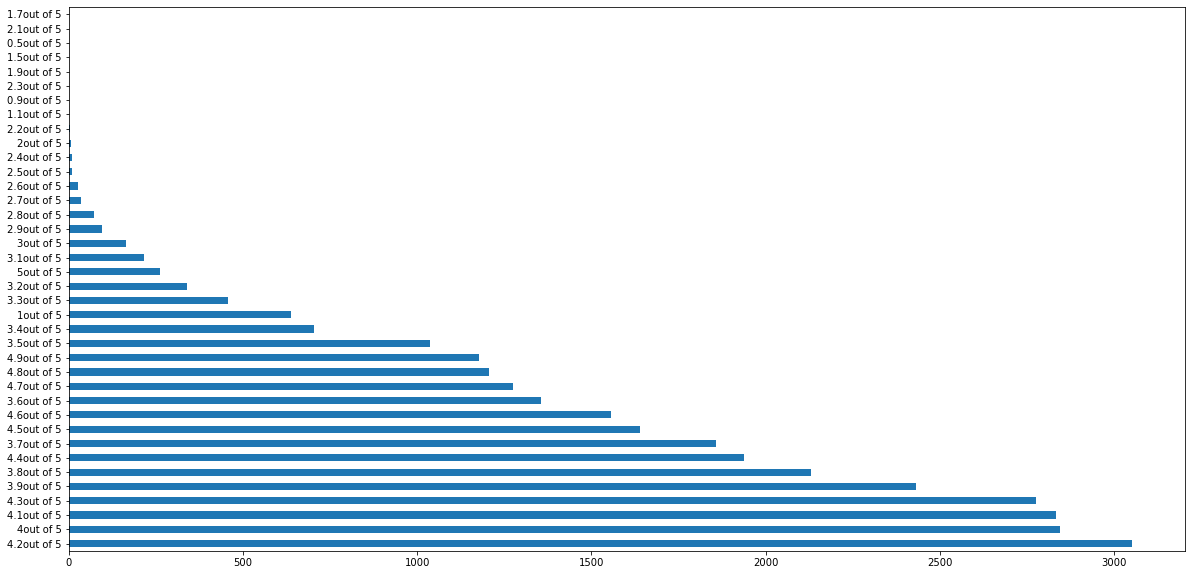

In [14]:
df['Rating'].value_counts().plot(kind='barh', figsize=(20,10))

Heat map of dataset : 


<AxesSubplot:>

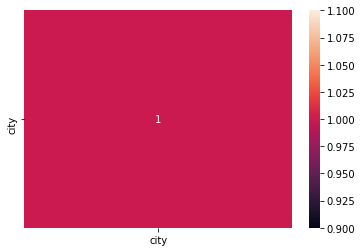

In [15]:
print('Heat map of dataset : ')
sns.heatmap(df1.corr(),annot=True)

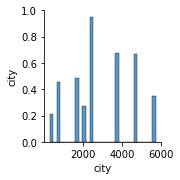

In [16]:
# PAIR PLOT
sns.pairplot(df1)

## Data Analysis & Feature Engineering

In [17]:
# NAME COLUMN
df1['Name']=df1.Name.str.split()
df1['Model_Year']=df1['Name']
df1['Company']=df1['Name']
df1['Model']=df1['Name']
df1['Variant']=df1['Name']
for i in range(0,len(df1.Name)):
    b=df1.Name[i]
    df1.Model_Year[i]=b[0]
    df1.Company[i]=b[1]
    df1.Model[i]=b[2]
    df1.Variant[i]=b[3]
    
# PRICE COLUMN
df1['Price']=df1.Price.str.split()
for i in range(0,len(df1.Price)):
    b=df1.Price[i]
    df1.Price[i]=b[1]

df1['Price']=df1.Price.str.split(',')
for i in range(0,len(df1.Price)):
    b=df1.Price[i]
    if(len(b)==1):
        df1.Price[i]=b[0]
    elif(len(b)==2):
        df1.Price[i]=b[0]+b[1]
    elif(len(b)==3):
        df1.Price[i]=b[0]+b[1]+b[2]
    elif(len(b)==4):
        df1.Price[i]=b[0]+b[1]+b[2]+b[3]
    
df1["Price"] = df1["Price"].astype(str).astype(int)
    
# RATING COLUMN
df1['Rating']=df1.Rating.str.split('out')
for i in range(0,len(df1.Rating)):
    b=df1.Rating[i]
    df1.Rating[i]=b[0]
    
df1["Rating"] = df1["Rating"].astype(str).astype(float)
    
# KILOMETERS COLUMN
df1['Kilometers']=df1.Kilometers.str.split('Kilometers')
for i in range(0,len(df1.Kilometers)):
    b=df1.Kilometers[i]
    df1.Kilometers[i]=b[1]

df1['Kilometers']=df1.Kilometers.str.split()
for i in range(0,len(df1.Kilometers)):
    b=df1.Kilometers[i]
    df1.Kilometers[i]=b[0]
    
df1['Kilometers']=df1.Kilometers.str.split(',')
for i in range(0,len(df1.Kilometers)):
    b=df1.Kilometers[i]
    if(len(b)==1):
        df1.Kilometers[i]=b[0]
    elif(len(b)==2):
        df1.Kilometers[i]=b[0]+b[1]
    elif(len(b)==3):
        df1.Kilometers[i]=b[0]+b[1]+b[2]
    elif(len(b)==4):
        df1.Kilometers[i]=b[0]+b[1]+b[2]+b[3]

df1["Kilometers"] = df1["Kilometers"].astype(str).astype(int)
    
# YEAR_OF_PURCHASE COLUMN
df1['Year_of_Purchase']=df1.Year_of_Purchase.str.split('Purchase')
df1['Year_Purchase']=df1['Year_of_Purchase']
df1['Month_Purchase']=df1['Year_of_Purchase']
for i in range(0,len(df1.Year_of_Purchase)):
    b=df1.Year_of_Purchase[i]
    df1.Year_of_Purchase[i]=b[1]

df1['Year_of_Purchase']=df1.Year_of_Purchase.str.split()
for i in range(0,len(df1.Year_of_Purchase)):
    b=df1.Year_of_Purchase[i]
    df1.Year_Purchase[i]=b[1]
    df1.Month_Purchase[i]=b[0]
    
# Owner COLUMN
df1['Owner']=df1.Owner.str.split('Owner')
for i in range(0,len(df1.Owner)):
    b=df1.Owner[i]
    df1.Owner[i]=b[1]
    
# Fuel_Type COLUMN
df1['Fuel_Type']=df1.Fuel_Type.str.split('Fuel')
for i in range(0,len(df1.Fuel_Type)):
    b=df1.Fuel_Type[i]
    df1.Fuel_Type[i]=b[1]
    
# Transmission COLUMN
df1['Transmission_Type']=df1['Transmission']
df1['Transmission']=df1.Transmission.str.split('sion')
df1['Transmission']=df1['Transmission'].fillna(0)
for i in range(0,len(df1.Transmission)):
    if(df1.Transmission[i]!=0):
        b=df1.Transmission[i]
        df1.Transmission[i]=b[1]

df1['Transmission']=df1['Transmission'].fillna(0)
for i in range(0,len(df1.Transmission)):
    if(df1.Transmission[i]!=0):
        b=df1.Transmission[i]
        df1.Transmission_Type[i]=b
        
# RTO COLUMN
df1['RTO_State']=df1['RTO']
df1['RTO_Distic']=df1['RTO']
df1['RTO']=df1.RTO.str.split('RTO')
for i in range(0,len(df1.RTO)):
    b=df1.RTO[i]
    df1.RTO[i]=b[1]

df1['RTO']=df1.RTO.str.split('([A-Z]+)')
for i in range(0,len(df1.RTO)):
    b=df1.RTO[i]
    df1.RTO_State[i]=b[1]
    df1.RTO_Distic[i]=b[2]

# INSURANCE COLUMN
df1['Insurance_Date']=df1['Insurance']
df1['Insurance_Month']=df1['Insurance']
df1['Insurance_Year']=df1['Insurance']
df1['Insurance']=df1.Insurance.str.split('e')
df1['Insurance']=df1['Insurance'].fillna(0)
for i in range(0,len(df1.Insurance)):
    if(df1.Insurance[i]!=0):
        b=df1.Insurance[i]
        df1.Insurance[i]=b[1]
        
df1['Insurance']=df1.Insurance.str.split('/')
df1['Insurance']=df1['Insurance'].fillna(0)
for i in range(0,len(df1.Insurance)):
    if(df1.Insurance[i]!=0):
        b=df1.Insurance[i]
        df1.Insurance_Date[i]=b[0]
        df1.Insurance_Month[i]=b[1]
        df1.Insurance_Year[i]=b[2]

# Insurance_Type COLUMN
df1['Insurance_Type']=df1.Insurance_Type.str.split('Insurance Type')
for i in range(0,len(df1.Insurance_Type)):
    b=df1.Insurance_Type[i]
    df1.Insurance_Type[i]=b[1]
    


<ipython-input-17-e7d41f5f2490>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Model_Year[i]=b[0]
<ipython-input-17-e7d41f5f2490>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Company[i]=b[1]
<ipython-input-17-e7d41f5f2490>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Model[i]=b[2]
<ipython-input-17-e7d41f5f2490>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

<ipython-input-17-e7d41f5f2490>:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Insurance_Type[i]=b[1]


In [18]:
df2=df1.copy()
df2=df2.drop(['Name','Model_Year','Year_of_Purchase','Transmission','RTO','Insurance'],axis=1)

In [19]:
year=2021
month=6

### 'Insurance_Date','Insurance_Month','Insurance_Year' to Insurance_Months
df2['Insurance_Date'] = pd.to_numeric(df2['Insurance_Date'],
                                      errors='coerce').astype('Int64')
df2['Insurance_Month'] = pd.to_numeric(df2['Insurance_Month'],
                                      errors='coerce').astype('Int64')
df2['Insurance_Year'] = pd.to_numeric(df2['Insurance_Year'],
                                      errors='coerce').astype('Int64')

df2['Insurance_Months']=df2['Insurance_Year']
df2['Insurance_Year']=df2['Insurance_Year'].fillna(0)

for i in range(0,len(df2.Insurance_Months)):
    if(df2.Insurance_Year[i]!=0):    
        Year_Insurance=df2.Insurance_Year[i]
        a=Year_Insurance-year
        Month_Insurance=df2.Insurance_Month[i]
        b=Month_Insurance-month
        if(a>0):
            df2.Insurance_Months[i]=a*12+(b)
        elif(a<=0):
            if(b>0):
                df2.Insurance_Months[i]=b
            else:
                df2.Insurance_Months[i]=0
        

df2=df2.drop(['Insurance_Date','Insurance_Month','Insurance_Year'],axis=1)

### 'Year_Purchase','Month_Purchase' to Years_Old
df2["Year_Purchase"] = df2["Year_Purchase"].astype(str).astype(int)
df2["Years_Old"] = df2["Year_Purchase"]

year=2021
for i in range(0,len(df2.Years_Old)):
    Year_Purchase=df2.Year_Purchase[i]
    a=year-Year_Purchase 
    df2.Years_Old[i]=a
    
df2=df2.drop(['Year_Purchase','Month_Purchase'],axis=1)

<ipython-input-19-85f63cee052c>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Years_Old[i]=a


In [20]:
df2['Insurance_Months']=df2['Insurance_Months'].fillna(2)

In [21]:
# INSURANCE_TYPE
df2['Insurance_Type']=df2['Insurance_Type'].replace(['Insurance Expired',
                                                'Expired'],'Insurane_Expired')

df2['Insurance_Type']=df2['Insurance_Type'].replace(['Comp','Comprehensive',
                         'Not Available','NA','null','Normal'],'Insurance_Comprehensive')

df2['Insurance_Type']=df2['Insurance_Type'].replace(['Third_party','3rd Party'],
                                                        'Insurance_3rd_Party')

df2['Insurance_Type']=df2['Insurance_Type'].replace(['Zero_Dep','Zero Depreciation'],
                                                 'Insurance_Zero_Depreciation')


# Insurance_Type , Insurance_Months
x=df2['Insurance_Type'].value_counts()
for i in range(0,len(x)):
    if(x[i]==9402):
        x[i]=0
    elif(x[i]==6290):
        x[i]=1
    elif(x[i]==11832):
        x[i]=2
    elif(x[i]==4634):
        x[i]=3
        
aaa=x.to_frame()
aaa['index']=aaa.index

df2['Insr_Type']=df2['Insurance_Type']
for i in range(0,len(df2['Insr_Type'])):
    for j in range(0,len(aaa)):
        if(df2.Insr_Type[i]==aaa.index[j]):
            df2.Insr_Type[i]=aaa.Insurance_Type[j]

df2=df2.drop(['Insurance_Type'],axis=1)

for i in range(0,len(df2['Insr_Type'])):
    if(df2.Insurance_Months[i]==0):
        df2.Insr_Type[i]=0

for i in range(0,len(df2['Insr_Type'])):
    if(df2.Insr_Type[i]==0):
        df2.Insurance_Months[i]=0

##  Insr_Type 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
change={0:'Insurane_Expired',1:'Insurance_3rd_Party',
        2:'Insurance_Comprehensive',3:'Insurance_Zero_Depreciation'}
df2.Insr_Type=df2.Insr_Type.map(change)

<ipython-input-21-68a1c5e29ee1>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Insr_Type[i]=aaa.Insurance_Type[j]
<ipython-input-21-68a1c5e29ee1>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Insr_Type[i]=0


In [22]:
df2['Transmission_Type']=df2['Transmission_Type'].fillna('MANUAL')
df2["city"] = df2["city"].astype(int).astype(str)

In [23]:
df2=df2[df2['Price']>10000].reset_index(drop=True)
df2['Car_Catgor']=df2['Model']
for i in range(0,len(df2['Car_Catgor'])):
    if(df2.Price[i]<=200000):
        df2.Car_Catgor[i]='low'
    elif(df2.Price[i]<=400000):
        df2.Car_Catgor[i]='Budget'
    elif(df2.Price[i]<=700000):
        df2.Car_Catgor[i]='Medium'
    elif(df2.Price[i]<=1500000):
        df2.Car_Catgor[i]='Highend'
    elif(df2.Price[i]<=20000000):
        df2.Car_Catgor[i]='Luxury'
    
df2=df2.drop(['Company','Model','Variant'],axis=1)

<ipython-input-23-511dcea9a2cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Car_Catgor[i]='low'
<ipython-input-23-511dcea9a2cb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Car_Catgor[i]='Budget'
<ipython-input-23-511dcea9a2cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Car_Catgor[i]='Medium'
<ipython-input-23-511dcea9a2cb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [24]:
df3=df2.copy()
df3.drop(['city'],axis=1,inplace=True)

## Spliting data as 'X' for train and 'x_validate' for validation 

In [25]:
from sklearn.model_selection import train_test_split
X,x_validate=train_test_split(df3,test_size=0.0016,random_state=10)

## EDA after Feature Engineering

In [26]:
print('Descriptive statistics of dataset : ')
X.describe()

Descriptive statistics of dataset : 


,Price,Rating,Kilometers,Insurance_Months,Years_Old
count,3.210400e+04,32104.000000,3.210400e+04,32104.000000,32104.000000
mean,4.760556e+05,4.046991,7.629852e+04,1.688855,8.619518
std,4.518967e+05,0.617059,5.304585e+04,2.755330,4.507807
min,1.200000e+04,0.500000,1.000000e+00,0.000000,1.000000
25%,2.100000e+05,3.800000,3.833375e+04,0.000000,5.000000
50%,3.682405e+05,4.100000,6.923150e+04,0.000000,8.000000
75%,6.000000e+05,4.400000,1.015292e+05,3.000000,11.000000
max,1.080170e+07,5.000000,1.234567e+06,35.000000,41.000000


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32104 entries, 18183 to 17673
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              32104 non-null  int32  
 1   Rating             32104 non-null  float64
 2   Kilometers         32104 non-null  int32  
 3   Owner              32104 non-null  object 
 4   Fuel_Type          32104 non-null  object 
 5   Transmission_Type  32104 non-null  object 
 6   RTO_State          32104 non-null  object 
 7   RTO_Distic         32104 non-null  object 
 8   Insurance_Months   32104 non-null  Int64  
 9   Years_Old          32104 non-null  int32  
 10  Insr_Type          32104 non-null  object 
 11  Car_Catgor         32104 non-null  object 
dtypes: Int64(1), float64(1), int32(3), object(7)
memory usage: 2.8+ MB


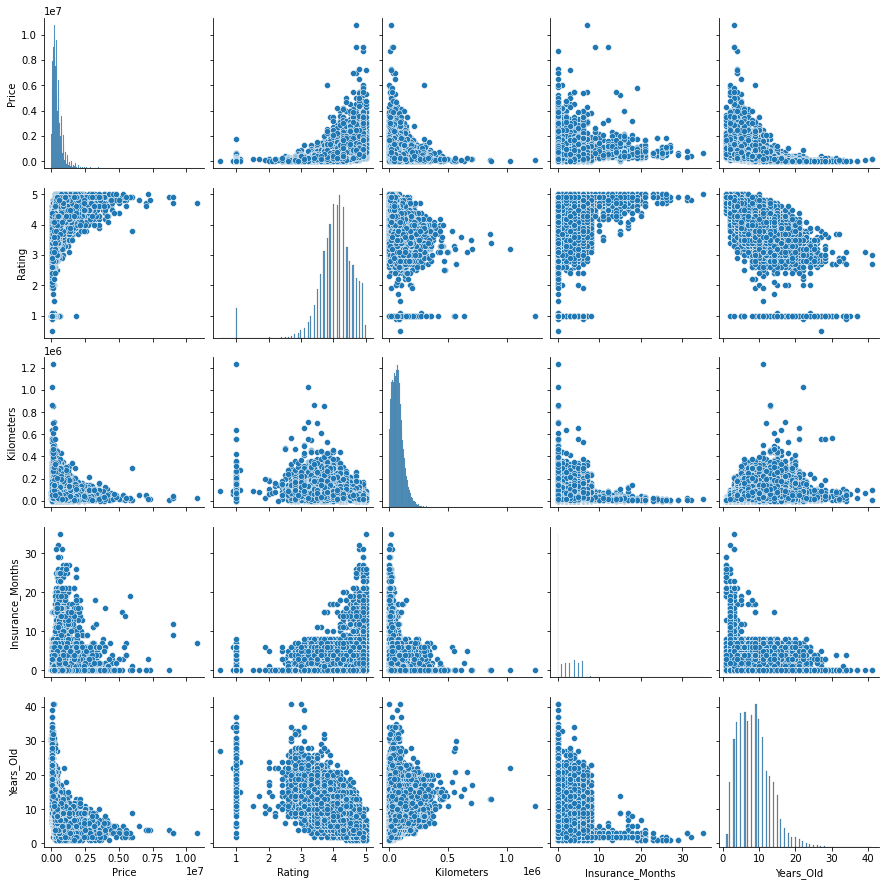

In [28]:
# PAIR PLOT
sns.pairplot(X)

In [29]:
# Correlation with Heatmap
X.corr()

,Price,Rating,Kilometers,Insurance_Months,Years_Old
Price,1.000000,0.426526,-0.188478,0.095794,-0.500140
Rating,0.426526,1.000000,-0.370364,0.174799,-0.708399
Kilometers,-0.188478,-0.370364,1.000000,-0.132833,0.386503
Insurance_Months,0.095794,0.174799,-0.132833,1.000000,-0.168848
Years_Old,-0.500140,-0.708399,0.386503,-0.168848,1.000000


Heat map of dataset : 


<AxesSubplot:>

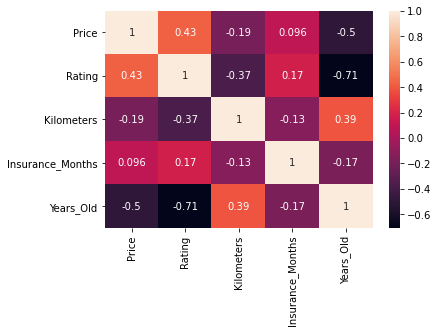

In [30]:
print('Heat map of dataset : ')
sns.heatmap(X.corr(),annot=True)

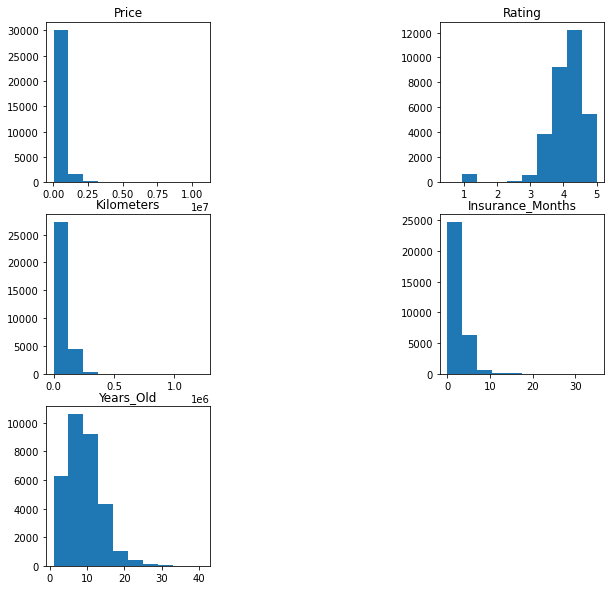

In [31]:
plt.subplots(figsize=(10, 10))

plt.subplot(3,3,1)
plt.hist(X['Price'])
plt.title('Price')

plt.subplot(3,3,3)
plt.hist(X['Rating'])
plt.title('Rating')

plt.subplot(3,3,4)
plt.hist(X['Kilometers'])
plt.title('Kilometers')

plt.subplot(3,3,6)
plt.hist(X['Insurance_Months'])
plt.title('Insurance_Months')

plt.subplot(3,3,7)
plt.hist(X['Years_Old'])
plt.title('Years_Old')

plt.show()

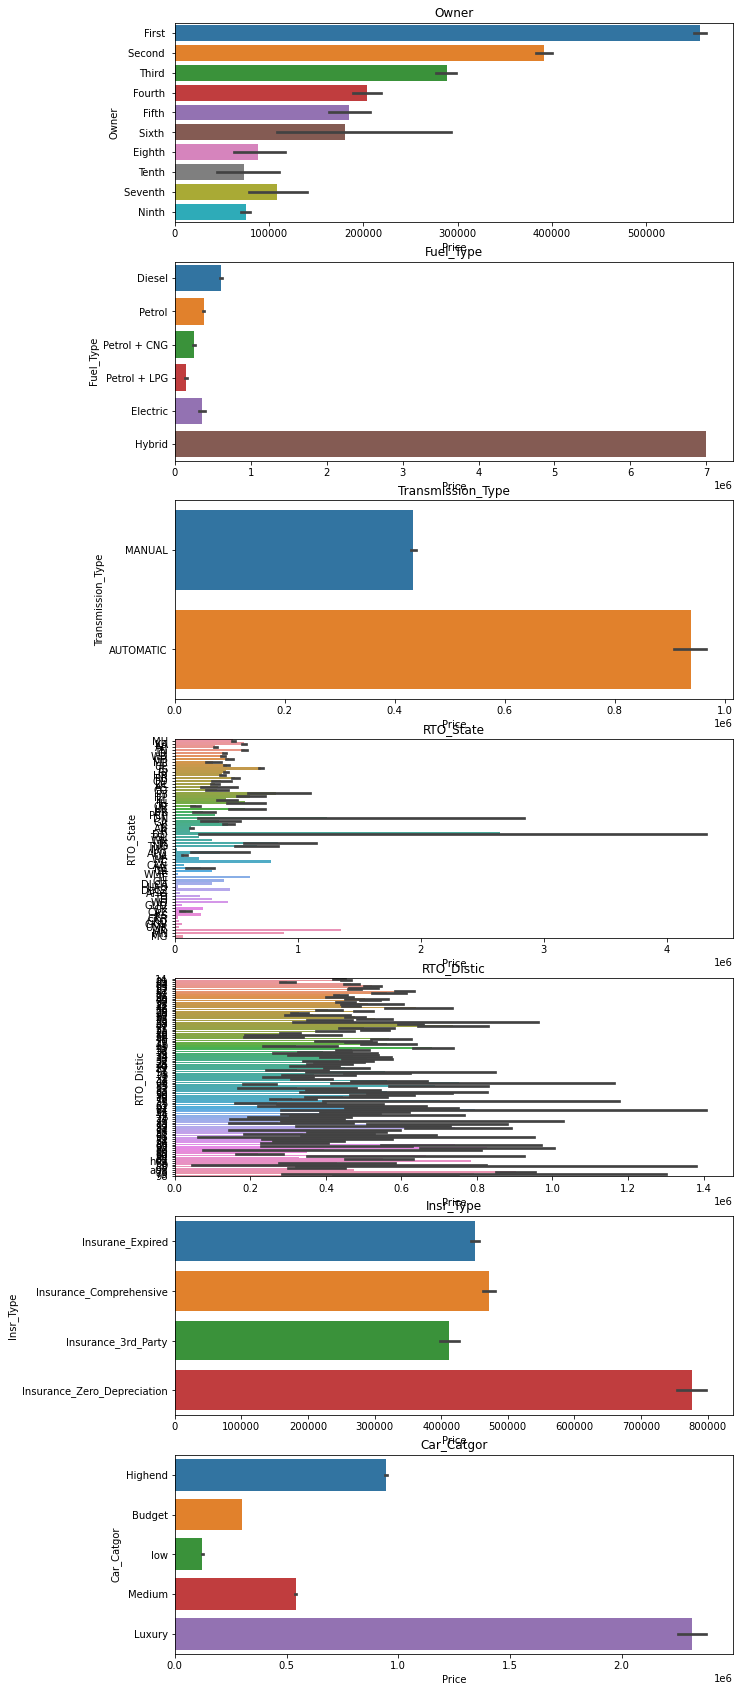

In [32]:
plt.subplots(figsize=(10,30))

plt.subplot(7,1,1)
sns.barplot(x='Price',y='Owner',data=X)
plt.title('Owner')

plt.subplot(7,1,2)
sns.barplot(x='Price',y='Fuel_Type',data=X)
plt.title('Fuel_Type')

plt.subplot(7,1,3)
sns.barplot(x='Price',y='Transmission_Type',data=X)
plt.title('Transmission_Type')

plt.subplot(7,1,4)
sns.barplot(x='Price',y='RTO_State',data=X)
plt.title('RTO_State')

plt.subplot(7,1,5)
sns.barplot(x='Price',y='RTO_Distic',data=X)
plt.title('RTO_Distic')

plt.subplot(7,1,6)
sns.barplot(x='Price',y='Insr_Type',data=X)
plt.title('Insr_Type')

plt.subplot(7,1,7)
sns.barplot(x='Price',y='Car_Catgor',data=X)
plt.title('Car_Catgor')

plt.show()

### COUNT PLOTS FOR EACH FEATURE

C:\anaconda\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


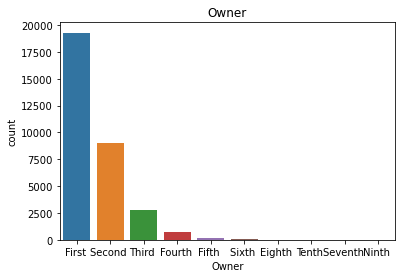

In [34]:
sns.countplot(X['Owner'])
plt.title('Owner')
plt.show()

C:\anaconda\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


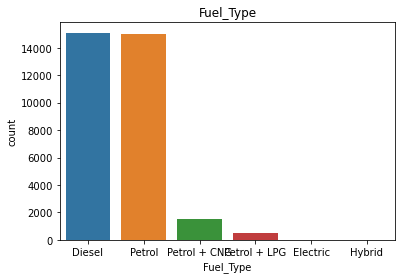

In [35]:
sns.countplot(X['Fuel_Type'])
plt.title('Fuel_Type')
plt.show()

C:\anaconda\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


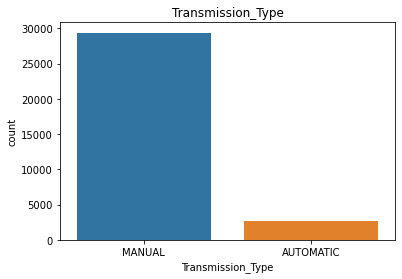

In [36]:
sns.countplot(X['Transmission_Type'])
plt.title('Transmission_Type')
plt.show()

C:\anaconda\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


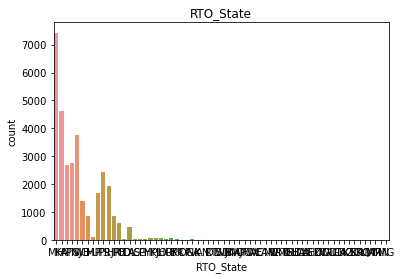

In [37]:
sns.countplot(X['RTO_State'])
plt.title('RTO_State')
plt.show()

C:\anaconda\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


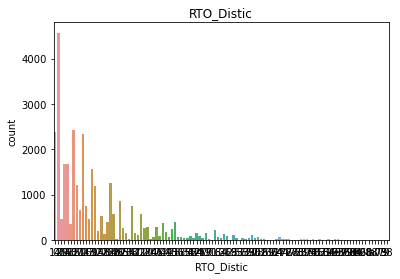

In [38]:
sns.countplot(X['RTO_Distic'])
plt.title('RTO_Distic')
plt.show()

C:\anaconda\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


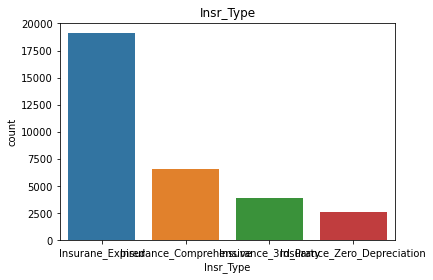

In [39]:
sns.countplot(X['Insr_Type'])
plt.title('Insr_Type')
plt.show()

C:\anaconda\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


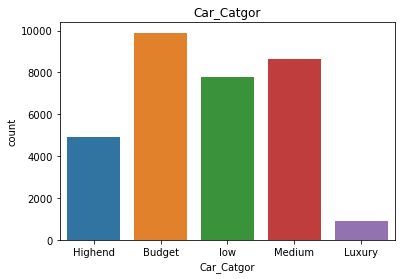

In [40]:
sns.countplot(X['Car_Catgor'])
plt.title('Car_Catgor')
plt.show()

## Encoding 

In [43]:
## OWNER
X['Owner']=X['Owner'].replace(['Fourth ', 'Sixth ', 'Fifth ',
                 'Eighth ', 'Seventh ', 'Ninth ', 'Tenth ',],'Fourth_and_above')

#Creating Dummy Values with Owner column Variables
dummy=pd.get_dummies(X.Owner)
# Concatinating dummy values with dataframe
X=pd.concat([X,dummy],axis=1)
# Droping Owner column from dataset
X.drop('Owner',axis=1,inplace=True)
#Droping dependent variable Fourth_and_above from dataset
X.drop('Fourth_and_above',axis=1,inplace=True)

## FUEL_TYPE
X['Fuel_Type']=X['Fuel_Type'].replace(['Petrol + LPG', 'Petrol + CNG',
                                        'Electric','Hybrid'],'Other_Fuel_Type')

#Creating Dummy Values with Fuel_Type column Variables
dummy=pd.get_dummies(X.Fuel_Type)
# Concatinating dummy values with dataframe
X=pd.concat([X,dummy],axis=1)
# Droping Fuel_Type column from dataset
X.drop('Fuel_Type',axis=1,inplace=True)
#Droping dependent variable Other_Fuel_Type from dataset
X.drop('Other_Fuel_Type',axis=1,inplace=True)

##  Transmission_Type 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
change={'AUTOMATIC':0,'MANUAL':1}
X.Transmission_Type=X.Transmission_Type.map(change)

## RTO_State
X['RTO_State']=X['RTO_State'].replace(['AP', 'TS','TN','KA','KL','APO','PY','TE'
                                  ],'South_India')
X['RTO_State']=X['RTO_State'].replace(['DL','HR','UP','CH','UK','PB',
                                  'HP'],'North_India')
X['RTO_State']=X['RTO_State'].replace(['MH','RJ','GJ','AS'],'West_India')
X['RTO_State']=X['RTO_State'].replace(['WB','OD','JH','AHO','OR','MP','MJF','CG',
       'WD','AS','TD', 'DLCA','TSL', 'AN', 'CAZ', 'TNO', 'BR', 'CAN', 'ML', 'K',
       'GA', 'CKR','KS', 'JK', 'CKQ', 'CKW', 'WN', 'WE', 'TR', 'WMF', 'D', 'DD',
       'MG','DN', 'UA', 'UAG', 'UMR', 'GH', 'GK', 'GUD', 'AR', 'C', 'DLCZ','MN',
       'PCP','R'],'Rest_India',)

#Creating Dummy Values with Owner column Variables
dummy=pd.get_dummies(X.RTO_State)
# Concatinating dummy values with dataframe
X=pd.concat([X,dummy],axis=1)
# Droping Owner column from dataset
X.drop('RTO_State',axis=1,inplace=True)
#Droping dependent variable Fourth_and_above from dataset
X.drop('Rest_India',axis=1,inplace=True)

X.drop('RTO_Distic',axis=1,inplace=True)

## Insr_Type
#Creating Dummy Values with Owner column Variables
dummy=pd.get_dummies(X.Insr_Type)
# Concatinating dummy values with dataframe
X=pd.concat([X,dummy],axis=1)
# Droping Insr_Type column from dataset
X.drop('Insr_Type',axis=1,inplace=True)
#Droping dependent variable Insurance_Zero_Depreciation from dataset
X.drop('Insurance_Zero_Depreciation',axis=1,inplace=True)

## Car_Catgor
#Creating Dummy Values with Car_Catgor column Variables
dummy=pd.get_dummies(X.Car_Catgor)
# Concatinating dummy values with dataframe
X=pd.concat([X,dummy],axis=1)
# Droping Owner column from dataset
X.drop('Car_Catgor',axis=1,inplace=True)
#Droping dependent variable Luxury from dataset
X.drop('Luxury',axis=1,inplace=True)

<ipython-input-43-b8f7ecea3c66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Owner']=X['Owner'].replace(['Fourth ', 'Sixth ', 'Fifth ',


In [44]:
## FUEL_TYPE
x_validate['Fuel_Type']=x_validate['Fuel_Type'].replace(['Petrol + LPG', 'Petrol + CNG',
                                        'Electric','Hybrid'],'Others')

## RTO_State
x_validate['RTO_State']=x_validate['RTO_State'].replace(['AP', 'TS','TN','KA','KL','APO','PY','TE'
                                  ],'South_India')
x_validate['RTO_State']=x_validate['RTO_State'].replace(['DL','HR','UP','CH','UK','PB',
                                  'HP'],'North_India')
x_validate['RTO_State']=x_validate['RTO_State'].replace(['MH','RJ','GJ','AS'],'West_India')
x_validate['RTO_State']=x_validate['RTO_State'].replace(['WB','OD','JH','AHO','OR','MP','MJF','CG',
       'WD','AS','TD', 'DLCA','TSL', 'AN', 'CAZ', 'TNO', 'BR', 'CAN', 'ML', 'K',
       'GA', 'CKR','KS', 'JK', 'CKQ', 'CKW', 'WN', 'WE', 'TR', 'WMF', 'D', 'DD',
       'MG','DN', 'UA', 'UAG', 'UMR', 'GH', 'GK', 'GUD', 'AR', 'C', 'DLCZ','MN',
       'PCP','R'],'East_India',)
x_validate.drop('RTO_Distic',axis=1,inplace=True)

<ipython-input-44-95a5c261a110>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_validate['Fuel_Type']=x_validate['Fuel_Type'].replace(['Petrol + LPG', 'Petrol + CNG',
<ipython-input-44-95a5c261a110>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_validate['RTO_State']=x_validate['RTO_State'].replace(['AP', 'TS','TN','KA','KL','APO','PY','TE'
<ipython-input-44-95a5c261a110>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

### Saving 'x_validate' dataset as CSV file for validation

In [207]:
x_validate.to_csv(r"./x_validate.csv",index=False)

## MODELING

In [45]:
x=X.drop(['Price'],axis=1).values
y=X['Price'].values

# Using StandardScaler 
#from sklearn.preprocessing import StandardScaler
#x=StandardScaler().fit_transform(x)

linearRegression
0.8173121944648202
0.8557184380859717


C:\anaconda\conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ml1')

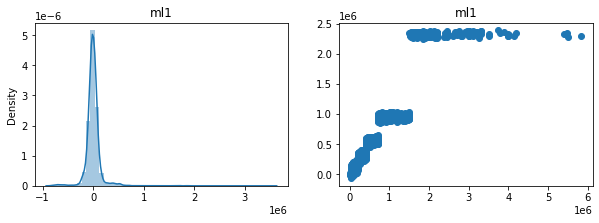

In [46]:
## ml1 linearRegression

# train test split
from sklearn.model_selection import train_test_split
x_train_ml1,x_test_ml1,y_train_ml1,y_test_ml1=train_test_split(x,y,test_size=0.2,random_state=8)

from sklearn.linear_model import LinearRegression
ml1=LinearRegression()
ml1.fit(x_train_ml1,y_train_ml1)
# predict values test dataset
y_pred_test_ml1=ml1.predict(x_test_ml1)
y_pred_train_ml1=ml1.predict(x_train_ml1)

# ml1
print('linearRegression')
ml1_train=np.abs(r2_score(y_train_ml1,y_pred_train_ml1))
print(ml1_train)

ml1_test=np.abs(r2_score(y_test_ml1,y_pred_test_ml1))
print(ml1_test)

plt.subplots(figsize=(10,3))

plt.subplot(1,2,1)
sns.distplot(y_test_ml1-y_pred_test_ml1)
plt.title('ml1')

plt.subplot(1,2,2)
plt.scatter(y_test_ml1,y_pred_test_ml1)
plt.title('ml1')

Polynomial
0.8306063766799061
0.8639615085801027


C:\anaconda\conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ml2')

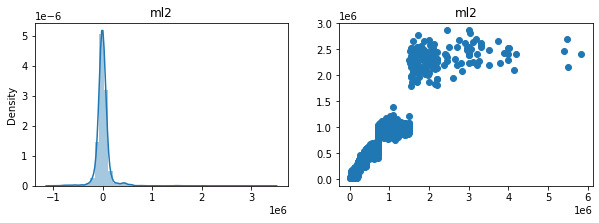

In [47]:
## ml2 Polynomial

from sklearn.preprocessing import PolynomialFeatures
poly_convert=PolynomialFeatures(degree=2,include_bias=False)
# fitting the transformer and gives new polynomial data
poly_features=poly_convert.fit_transform(x)

# train test split
from sklearn.model_selection import train_test_split
x_train_ml2,x_test_ml2,y_train_ml2,y_test_ml2=train_test_split(poly_features,y,test_size=0.2,random_state=8)

# importing linearRegression
from sklearn.linear_model import LinearRegression
ml2=LinearRegression()
ml2.fit(x_train_ml2,y_train_ml2)
# predict values
y_pred_test_ml2=ml2.predict(x_test_ml2)
y_pred_train_ml2=ml2.predict(x_train_ml2)

# ml2
print('Polynomial')
ml2_train=np.abs(r2_score(y_train_ml2,y_pred_train_ml2))
print(ml2_train)

ml2_test=np.abs(r2_score(y_test_ml2,y_pred_test_ml2))
print(ml2_test)

plt.subplots(figsize=(10,3))

plt.subplot(1,2,1)
sns.distplot(y_test_ml2-y_pred_test_ml2)
plt.title('ml2')

plt.subplot(1,2,2)
plt.scatter(y_test_ml2,y_pred_test_ml2)
plt.title('ml2')

DecisionTreeRegressor
0.8340620468076976
0.8671658554063275


C:\anaconda\conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ml3')

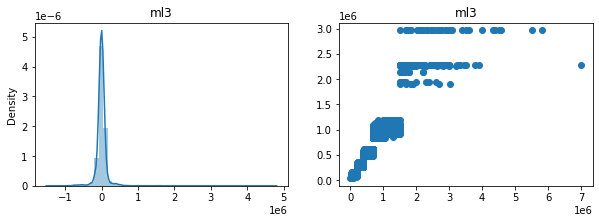

In [48]:
## ml3 DecisionTreeRegressor

x_train_ml3,x_test_ml3,y_train_ml3,y_test_ml3=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.tree import DecisionTreeRegressor
ml3=  DecisionTreeRegressor(max_depth=7,min_samples_split=9,min_samples_leaf=39)
ml3.fit(x_train_ml3,y_train_ml3)
# predict values
y_pred_test_ml3=ml3.predict(x_test_ml3)
y_pred_train_ml3=ml3.predict(x_train_ml3)

# ml3
print('DecisionTreeRegressor')
ml3_train=np.abs(r2_score(y_train_ml3,y_pred_train_ml3))
print(ml3_train)

ml3_test=np.abs(r2_score(y_test_ml3,y_pred_test_ml3))
print(ml3_test)

plt.subplots(figsize=(10,3))

plt.subplot(1,2,1)
sns.distplot(y_test_ml3-y_pred_test_ml3)
plt.title('ml3')

plt.subplot(1,2,2)
plt.scatter(y_test_ml3,y_pred_test_ml3)
plt.title('ml3')

RandomForestRegressor
0.8428670938953964
0.8658452535478


C:\anaconda\conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ml4')

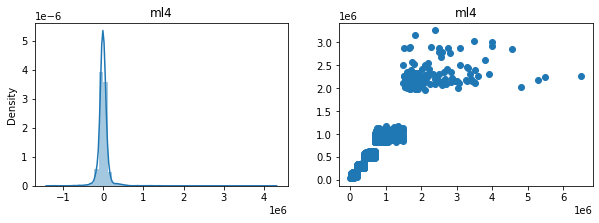

In [49]:
## ml4 RandomForestRegressor

x_train_ml4,x_test_ml4,y_train_ml4,y_test_ml4=train_test_split(x,y,test_size=0.2,random_state=7)
from sklearn.ensemble import RandomForestRegressor
ml4=RandomForestRegressor(n_estimators=42,max_depth=8,min_samples_split=10,min_samples_leaf=30)
ml4.fit(x_train_ml4,y_train_ml4)

y_pred_test_ml4=ml4.predict(x_test_ml4)
y_pred_train_ml4=ml4.predict(x_train_ml4)

# ml4
print('RandomForestRegressor')
ml4_train=np.abs(r2_score(y_train_ml4,y_pred_train_ml4))
print(ml4_train)

ml4_test=np.abs(r2_score(y_test_ml4,y_pred_test_ml4))
print(ml4_test)

plt.subplots(figsize=(10,3))

plt.subplot(1,2,1)
sns.distplot(y_test_ml4-y_pred_test_ml4)
plt.title('ml4')

plt.subplot(1,2,2)
plt.scatter(y_test_ml4,y_pred_test_ml4)
plt.title('ml4')

C:\anaconda\conda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13812e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\anaconda\conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Ridge
0.8348937472253747
0.8311431954389771


Text(0.5, 1.0, 'ml5')

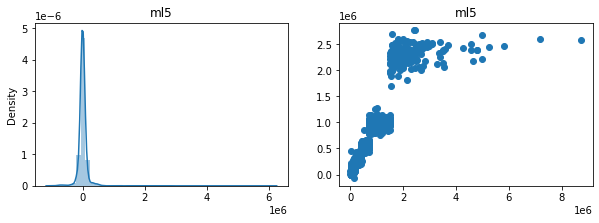

In [50]:
## ml5 Ridge

from sklearn.preprocessing import PolynomialFeatures
poly_convert=PolynomialFeatures(degree=2,include_bias=False)
# fitting the transformer and gives new polynomial data
poly_features=poly_convert.fit_transform(x)

# train test split
from sklearn.model_selection import train_test_split
x_train_ml5,x_test_ml5,y_train_ml5,y_test_ml5=train_test_split(poly_features,y,test_size=0.2,random_state=32)

# importing linearRegression
from sklearn.linear_model import Ridge
ml5=Ridge()
ml5.fit(x_train_ml5,y_train_ml5)
# predict values
y_pred_test_ml5=ml5.predict(x_test_ml5)
y_pred_train_ml5=ml5.predict(x_train_ml5)

# ml5
print('Ridge')
ml5_train=np.abs(r2_score(y_train_ml5,y_pred_train_ml5))
print(ml5_train)

ml5_test=np.abs(r2_score(y_test_ml5,y_pred_test_ml5))
print(ml5_test)

plt.subplots(figsize=(10,3))

plt.subplot(1,2,1)
sns.distplot(y_test_ml5-y_pred_test_ml5)
plt.title('ml5')

plt.subplot(1,2,2)
plt.scatter(y_test_ml5,y_pred_test_ml5)
plt.title('ml5')

C:\anaconda\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433182066962389.4, tolerance: 520353948927.08545
  model = cd_fast.enet_coordinate_descent(
C:\anaconda\conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lasso
0.8336490137056832
0.8293159767434382


Text(0.5, 1.0, 'ml6')

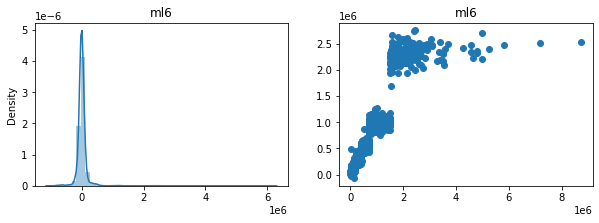

In [51]:
## ml6 Lasso

from sklearn.preprocessing import PolynomialFeatures
poly_convert=PolynomialFeatures(degree=2,include_bias=False)
# fitting the transformer and gives new polynomial data
poly_features=poly_convert.fit_transform(x)

# train test split
from sklearn.model_selection import train_test_split
x_train_ml6,x_test_ml6,y_train_ml6,y_test_ml6=train_test_split(poly_features,y,test_size=0.2,random_state=32)

# importing linearRegression
from sklearn.linear_model import Lasso
ml6=Lasso()
ml6.fit(x_train_ml6,y_train_ml6)
# predict values
y_pred_test_ml6=ml6.predict(x_test_ml6)
y_pred_train_ml6=ml6.predict(x_train_ml6)

# ml6
print('Lasso')
ml6_train=np.abs(r2_score(y_train_ml6,y_pred_train_ml6))
print(ml6_train)

ml6_test=np.abs(r2_score(y_test_ml6,y_pred_test_ml6))
print(ml6_test)

plt.subplots(figsize=(10,3))

plt.subplot(1,2,1)
sns.distplot(y_test_ml6-y_pred_test_ml6)
plt.title('ml6')

plt.subplot(1,2,2)
plt.scatter(y_test_ml6,y_pred_test_ml6)
plt.title('ml6')

xgboost
0.8714116636756883
0.8832771220046975


Text(0.5, 1.0, 'ml7')

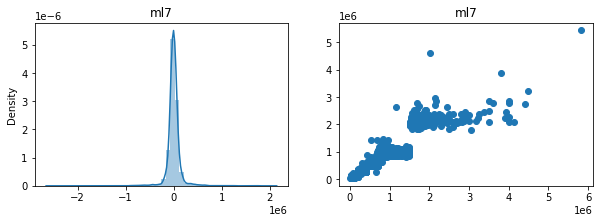

In [52]:
## ml7 XGB

x_train_ml7,x_test_ml7,y_train_ml7,y_test_ml7=train_test_split(x,y,test_size=0.2,random_state=31)
import warnings
warnings.simplefilter("ignore")
import xgboost as xgb
ml7=  xgb.XGBRegressor(random_state=0,n_estimators=13,max_depth=6,n_jobs=0)
ml7.fit(x_train_ml7,y_train_ml7)

y_pred_test_ml7=ml7.predict(x_test_ml7)
y_pred_train_ml7=ml7.predict(x_train_ml7)

# ml7
print('xgboost')
ml7_train=np.abs(r2_score(y_train_ml7,y_pred_train_ml7))
print(ml7_train)

ml7_test=np.abs(r2_score(y_test_ml7,y_pred_test_ml7))
print(ml7_test)

plt.subplots(figsize=(10,3))

plt.subplot(1,2,1)
sns.distplot(y_test_ml7-y_pred_test_ml7)
plt.title('ml7')

plt.subplot(1,2,2)
plt.scatter(y_test_ml7,y_pred_test_ml7)
plt.title('ml7')

## Evaluation 

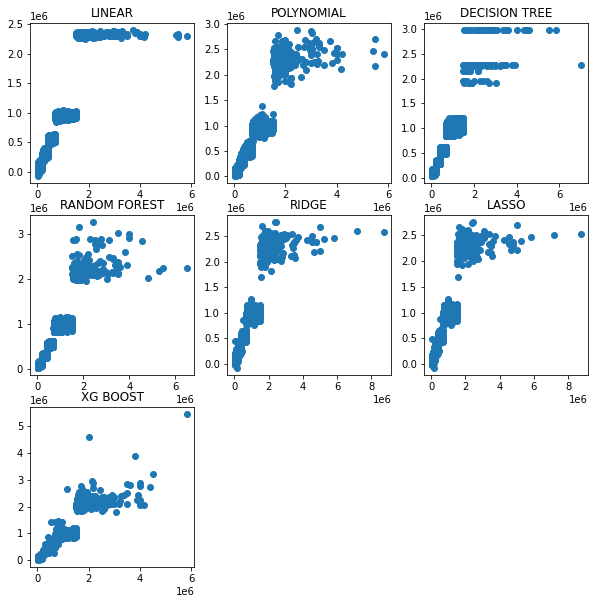

In [53]:
plt.subplots(figsize=(10, 10))

plt.subplot(3,3,1)
plt.scatter(y_test_ml1,y_pred_test_ml1)
plt.title('LINEAR')

plt.subplot(3,3,2)
plt.scatter(y_test_ml2,y_pred_test_ml2)
plt.title('POLYNOMIAL')

plt.subplot(3,3,3)
plt.scatter(y_test_ml3,y_pred_test_ml3)
plt.title('DECISION TREE')

plt.subplot(3,3,4)
plt.scatter(y_test_ml4,y_pred_test_ml4)
plt.title('RANDOM FOREST')

plt.subplot(3,3,5)
plt.scatter(y_test_ml5,y_pred_test_ml5)
plt.title('RIDGE')

plt.subplot(3,3,6)
plt.scatter(y_test_ml6,y_pred_test_ml6)
plt.title('LASSO')

plt.subplot(3,3,7)
plt.scatter(y_test_ml7,y_pred_test_ml7)
plt.title('XG BOOST')

plt.show()

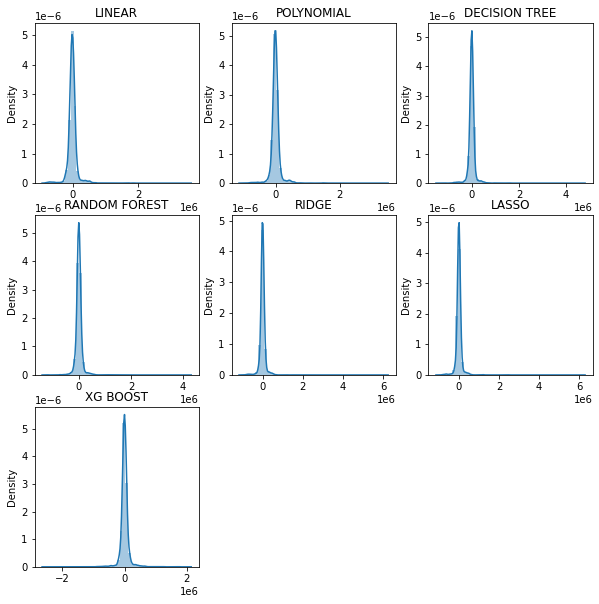

In [54]:
plt.subplots(figsize=(10, 10))

plt.subplot(3,3,1)
sns.distplot(y_test_ml1-y_pred_test_ml1)
plt.title('LINEAR')

plt.subplot(3,3,2)
sns.distplot(y_test_ml2-y_pred_test_ml2)
plt.title('POLYNOMIAL')

plt.subplot(3,3,3)
sns.distplot(y_test_ml3-y_pred_test_ml3)
plt.title('DECISION TREE')

plt.subplot(3,3,4)
sns.distplot(y_test_ml4-y_pred_test_ml4)
plt.title('RANDOM FOREST')

plt.subplot(3,3,5)
sns.distplot(y_test_ml5-y_pred_test_ml5)
plt.title('RIDGE')

plt.subplot(3,3,6)
sns.distplot(y_test_ml6-y_pred_test_ml6)
plt.title('LASSO')

plt.subplot(3,3,7)
sns.distplot(y_test_ml7-y_pred_test_ml7)
plt.title('XG BOOST')

plt.show()

In [358]:
from pandas import DataFrame
b=DataFrame({   'Model':['Linear',
                         'Polynomial',
                         'DecisionTree',
                         'RandomForest',
                         'Ridge',
                         'Lasso',
                         'XGboost'],
                'Train_R2':[np.abs(r2_score(y_train_ml1,y_pred_train_ml1)),
                            np.abs(r2_score(y_train_ml2,y_pred_train_ml2)),
                            np.abs(r2_score(y_train_ml3,y_pred_train_ml3)),
                            np.abs(r2_score(y_train_ml4,y_pred_train_ml4)),
                            np.abs(r2_score(y_train_ml5,y_pred_train_ml5)),
                            np.abs(r2_score(y_train_ml6,y_pred_train_ml6)),
                            np.abs(r2_score(y_train_ml7,y_pred_train_ml7))],
                'Test_R2':[np.abs(r2_score(y_test_ml1,y_pred_test_ml1)),
                           np.abs(r2_score(y_test_ml2,y_pred_test_ml2)),
                           np.abs(r2_score(y_test_ml3,y_pred_test_ml3)),
                           np.abs(r2_score(y_test_ml4,y_pred_test_ml4)),
                           np.abs(r2_score(y_test_ml5,y_pred_test_ml5)),
                           np.abs(r2_score(y_test_ml6,y_pred_test_ml6)),
                           np.abs(r2_score(y_test_ml7,y_pred_test_ml7))] 
            })
               
             
b

,Model,Train_R2,Test_R2
0,Linear,0.817312,0.855718
1,Polynomial,0.830606,0.863962
2,DecisionTree,0.834062,0.867166
3,RandomForest,0.842545,0.866149
4,Ridge,0.834894,0.831143
5,Lasso,0.833649,0.829316
6,XGboost,0.871412,0.883277


### from the above evaluations we can conclude that 'XGBOOSTRegressor' is the best fit MODEL

## Saving file model

In [360]:
import pickle
pickle.dump(ml7,open('model_ml7.pkl','wb'))